### Dataset Dictionary

Header | Definition
---|---------
`URL`| The URL of the comic character on the Marvel Wikia
`Name/Alias` | The full name or alias of the character
`Appearances` | The number of comic books that character appeared in as of April 30 
`Current?` | Is the member currently active on an avengers affiliated team?
`Gender` | The recorded gender of the character
`Probationary` | Sometimes the character was given probationary status as an Avenger, this is the date that happened
`Full/Reserve` | The month and year the character was introduced as a full or reserve member of the Avengers
`Year` | The year the character was introduced as a full or reserve member of the Avengers
`Years since joining` | 2015 minus the year
`Honorary` | The status of the avenger, if they were given "Honorary" Avenger status, if they are simply in the "Academy," or "Full" otherwise
`Death1` | Yes if the Avenger died, No if not. 
`Return1` | Yes if the Avenger returned from their first death, No if  they did not, blank if not applicable
`Death2` | Yes if the Avenger died a second time after their revival, No if they did not, blank if not applicable
`Return2` | Yes if the Avenger returned from their second death, No if they did not, blank if not applicable
`Death3` | Yes if the Avenger died a third time after their second revival, No if they did not, blank if not applicable
`Return3` | Yes if the Avenger returned from their third death, No if they did not, blank if not applicable
`Death4` | Yes if the Avenger died a fourth time after their third revival, No if they did not, blank if not applicable
`Return4` | Yes if the Avenger returned from their fourth death, No if they did not, blank if not applicable
`Death5` | Yes if the Avenger died a fifth time after their fourth revival, No if they did not, blank if not applicable
`Return5` | Yes if the Avenger returned from their fifth death, No if they did not, blank if not applicable
`Notes` | Descriptions of deaths and resurrections. 

# Questions to answer

1. <s>Quantos Vingadores morreram pelo menos uma vez?</s>
2. <s>Top 10 personagens com mais mortes</s>
3. <s>Todos os personagens morreram em algum momento?</s>
4. <s>Qual é a distribuição de mortes entre os personagens?</s>
5. <s>Quantas vezes os Vingadores retornaram de mortes?</s>
6. <s>Há diferença na mortalidade entre personagens de diferentes gêneros?</s>
7. <s>A mortalidade dos Vingadores mudou ao longo dos anos?</s>
8. <s>Há Vingadores que morreram múltiplas vezes e voltaram?</s>
9. <s>Quais personagens estão atualmente ativos ou inativos?</s>
10. <s>Quais são os personagens com mais aparições que nunca morreram?</s>
11. <s>Qual é a média de tempo (em anos) desde que um personagem foi introduzido nos Vingadores?</s>

## Importing Libraries

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tabulate import tabulate

plt.style.use('ggplot')

file_path = 'data/avengers.csv'

In [112]:
avengers = pd.read_csv(file_path, encoding='ISO-8859-1')

## Entendendo os dados

In [ ]:
avengers.describe()

In [ ]:
avengers.info()

## Corrigindo a coluna 'Name/Alias'

<p>Identificamos que a coluna com os nomes dos vingadores possui alguns campos vazios.</p>

<p>Para resolver esse problema, nós poderiamos excluir os valores vazios ou escrever <i>Unknown</i> no lugar dos valores vazios.</p>

<p>Porém nós temos a coluna <i>URL</i> que contém o nome dos heróis no link. Então nesse caso nós podemos extrair o nome dos heróis e colocar no lugar dos valores vazios.</p>



In [115]:
# Função para extrair o nome do personagem da URL

def extract_name_from_url(url):
    
    #Queremos o que está entre as barras '/' e antes dos parênteses '('
    
    #Como nesse exemplo: marvel.wikia.com/Jocasta_(Earth-616)
    
    match = re.search(r'/([^/]+)_\(Earth-\d+\)', url)
    
    if match:
    
        return match.group(1).replace('_', ' ') #Substituimos o '_' por um espaço
    
    return None
    

In [116]:
avengers ['Name/Alias'] = avengers['Name/Alias'].fillna(avengers['URL'].apply(extract_name_from_url))

### Quantos Vingadores morreram pelo menos uma vez?

In [178]:
avengers['Died'] = avengers[['Death1','Death2', 'Death3', 'Death4', 'Death5']].apply(lambda x: 'YES' in x.values, axis=1)

dead_avengers = avengers['Died'].sum()

print(f'Numero de vingadores que morreram pelo menos uma vez: {dead_avengers}')

Numero de vingadores que morreram pelo menos uma vez: 69


In [118]:
died_counts = avengers['Died'].value_counts()

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=died_counts.index, y = died_counts.values, palette='viridis')

plt.title('Numero de vingadores que Morreram pelo menos uma vez')
plt.xlabel('Morreu Pelo Menos Uma Vez')
plt.ylabel('Número de Vingadores')
plt.show()

### Top 10 Avengers Who Died the Most

In [120]:
death_columns = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']

avengers['Total_Deaths'] = avengers[death_columns].apply(lambda x: x.str.contains('YES').sum(), axis=1)


In [121]:
top_10_deaths = avengers.sort_values(by = 'Total_Deaths', ascending = False).head(10)

In [ ]:
top_10_deaths

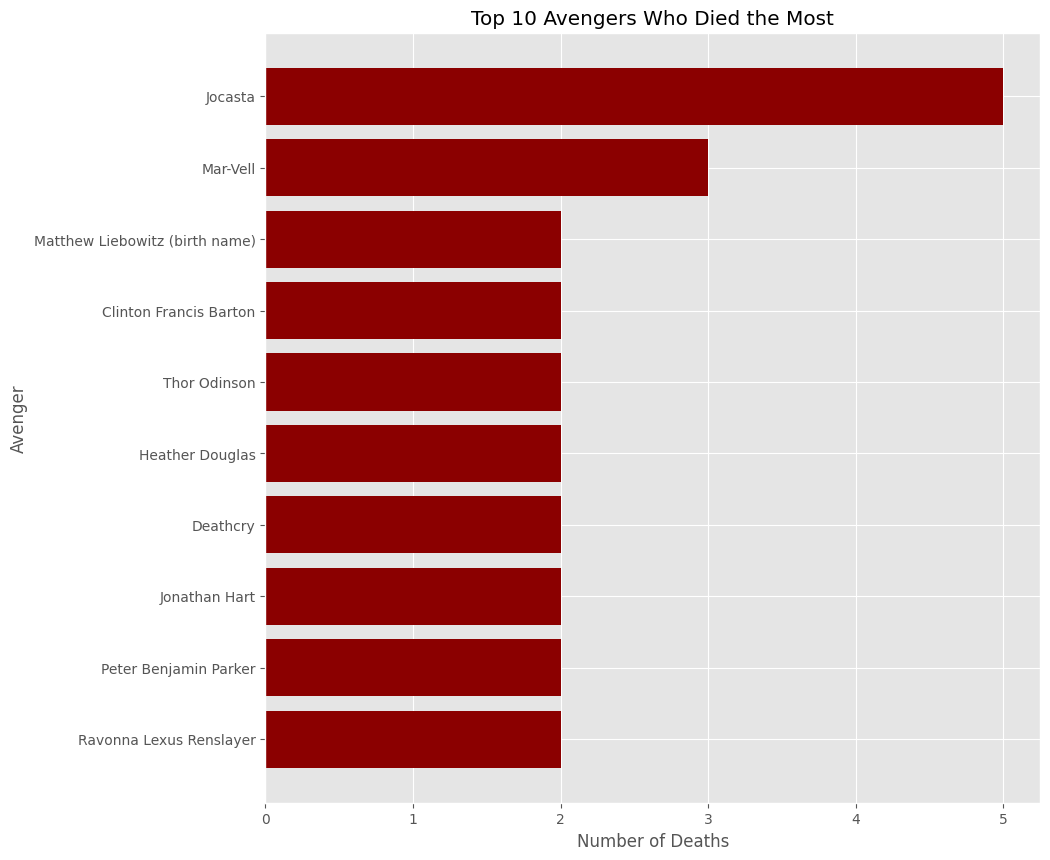

In [179]:
plt.figure(figsize=(10,10))
plt.barh(top_10_deaths['Name/Alias'], top_10_deaths['Total_Deaths'], color='darkred')
plt.xlabel('Number of Deaths')
plt.ylabel('Avenger')
plt.title('Top 10 Avengers Who Died the Most')
plt.gca().invert_yaxis()
plt.show()

### Todos os personagens morreram em algum momento?

In [189]:
all_characters_died = avengers['Died'].all()

if all_characters_died:
    print('All characters have died')
else:
    print('Not all characters have died')
    
    never_died = avengers[~avengers['Died']]
    
    print (f'Number of characters who have not died: {len(never_died)}')
    
    never_died_list = never_died[['Name/Alias']].reset_index(drop=True).values.tolist()
    print("\nCharacters who have not died:")
    print(tabulate(never_died_list, headers=['Name/Alias'], tablefmt='fancy_grid'))

Not all characters have died
Number of characters who have not died: 104

Characters who have not died:
╒═════════════════════════════════════╕
│ Name/Alias                          │
╞═════════════════════════════════════╡
│ Richard Milhouse Jones              │
├─────────────────────────────────────┤
│ Heracles                            │
├─────────────────────────────────────┤
│ T'Challa                            │
├─────────────────────────────────────┤
│ Dane Whitman                        │
├─────────────────────────────────────┤
│ Henry P. McCoy                      │
├─────────────────────────────────────┤
│ Yondu Udonta                        │
├─────────────────────────────────────┤
│ Martinex T'Naga                     │
├─────────────────────────────────────┤
│ Charlie-27                          │
├─────────────────────────────────────┤
│ Nicholette Gold                     │
├─────────────────────────────────────┤
│ Stakar                              │
├───────────────

### Qual é a distribuição de mortes entre os personagens?

In [184]:
avengers ['Total_Deaths'] = avengers[death_columns].apply(lambda x: sum(pd.notna(x)), axis = 1)

avengers[['Name/Alias', 'Total_Deaths']]

,Name/Alias,Total_Deaths
0,"Henry Jonathan ""Hank"" Pym",1
1,Janet van Dyne,1
2,"Anthony Edward ""Tony"" Stark",1
3,Robert Bruce Banner,1
4,Thor Odinson,2
...,...,...
168,Eric Brooks,1
169,Adam Brashear,1
170,Victor Alvarez,1
171,Ava Ayala,1


### Distribution of Number of Deaths Among Avengers

This histogram shows the distribution of the number of deaths among Avengers characters. Each bar represents the count of characters that have experienced a specific number of deaths. The x-axis shows the number of deaths, while the y-axis represents the number of Avengers with that number of deaths.


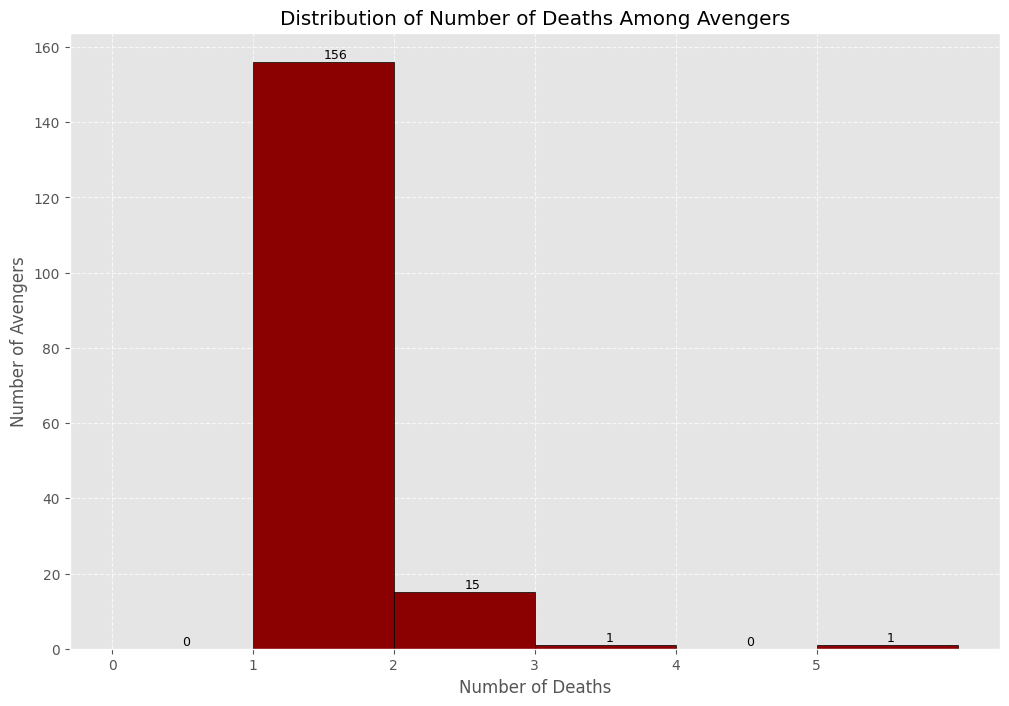

In [181]:
# Configurar o gráfico
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(avengers['Total_Deaths'].dropna(), bins=range(int(avengers['Total_Deaths'].max() + 2)), edgecolor='black', color='darkred')

# Adicionar títulos e rótulos
plt.title('Distribution of Number of Deaths Among Avengers')
plt.xlabel('Number of Deaths')
plt.ylabel('Number of Avengers')
plt.xticks(range(int(avengers['Total_Deaths'].max() + 1)))
plt.grid(True, linestyle='--', alpha=0.7)

# Adicionar anotações
for count, bin_edge in zip(n, bins):
    plt.text(bin_edge + 0.5, count + 1, f'{int(count)}', fontsize=9, color='black')

# Exibir o gráfico
plt.show()

### Quantas vezes os Vingadores retornaram de mortes?

In [191]:
return_counts = avengers[['Return1', 'Return2', 'Return3', 'Return4', 'Return5']].apply(lambda x: x.str.contains('YES', na = False).sum(), axis = 1)

total_returns = return_counts.sum()

print(f'Total number of returns from death: {total_returns}')

Total number of returns from death: 57


In [186]:
avengers['Total_Returns'] = avengers[['Return1', 'Return2', 'Return3', 'Return4', 'Return5']].apply(lambda x: x.str.contains('YES', na=False).sum(), axis=1)

return_distribution = avengers['Total_Returns'].value_counts().sort_index()

In [187]:
print(return_distribution)

Total_Returns
0    127
1     38
2      7
5      1
Name: count, dtype: int64


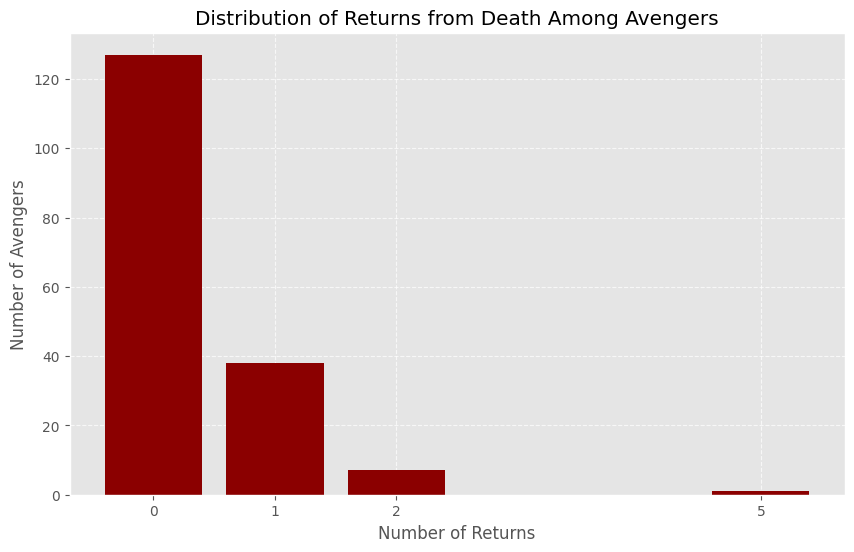

In [188]:
# Configurar o gráfico
plt.figure(figsize=(10, 6))
plt.bar(return_distribution.index, return_distribution.values, color='darkred')

# Adicionar títulos e rótulos
plt.title('Distribution of Returns from Death Among Avengers')
plt.xlabel('Number of Returns')
plt.ylabel('Number of Avengers')
plt.xticks(return_distribution.index)
plt.grid(True, linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()


In [ ]:
# Encontrar o Vingador que retornou cinco vezes
five_returns = avengers[avengers['Total_Returns'] == 5]
print(five_returns[['Name/Alias', 'Total_Returns']])


### Há diferença na mortalidade entre personagens de diferentes gêneros?

In [ ]:
deaths_by_gender = avengers.groupby('Gender')['Total_Deaths'].sum()

deaths_by_gender

In [ ]:
plt.figure(figsize=(10, 6))
deaths_by_gender.plot(kind='bar', color='darkblue')
plt.xlabel('Gender')
plt.ylabel('Total Number of Deaths')
plt.title('Total Number of Deaths by Gender')
plt.xticks(rotation=45)
plt.show()

### A mortalidade dos Vingadores mudou ao longo dos anos?

In [142]:
deaths_by_year = avengers.groupby('Year')['Died'].sum()

mortality_df = deaths_by_year.reset_index(name = 'Total_Deaths')

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(mortality_df['Year'], mortality_df['Total_Deaths'], marker='o', color='darkblue')
plt.title('Number of Deaths of Avengers Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.xticks(mortality_df['Year'][::5], rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

### Há Vingadores que morreram múltiplas vezes e voltaram?

In [ ]:
multiple_deaths_returned = avengers[(avengers[['Death2', 'Death3', 'Death4', 'Death5']] == 'YES').any(axis=1) &
         (avengers[['Return1', 'Return2', 'Return3', 'Return4', 'Return5']] == 'YES').any(axis=1)]

multiple_deaths_returned_names = multiple_deaths_returned[['Name/Alias', 'Death1', 'Death2', 'Death3', 'Death4', 'Death5', 'Return1', 'Return2', 'Return3', 'Return4', 'Return5']]

multiple_deaths_returned_names

### Quais personagens estão atualmente ativos ou inativos?

In [ ]:
active_avengers = avengers[avengers['Current?'] == 'YES']
inactive_avengers = avengers[avengers['Current?'] == 'NO']

print(f"Number of active avengers: {len(active_avengers)} \n")
print(f"Number of inactive avengers: {len(inactive_avengers)} \n")

print("\nActive avengers:")
print(active_avengers['Name/Alias'].to_string(index=False))


In [ ]:
print("\nInactive avengers:")
print(inactive_avengers['Name/Alias'].to_string(index=False))

### Quais são os personagens com mais aparições que nunca morreram?

In [174]:
top_appear_never_died = never_died.sort_values(by = 'Appearances', ascending = False)

print("Top 10 Avengers with the most appearances who never died: ")
print(top_appear_never_died[['Name/Alias', 'Appearances']].head(10).to_string(index = False))

Top 10 Avengers with the most appearances who never died: 
                    Name/Alias  Appearances
                 Reed Richards         2125
                Henry P. McCoy         1886
    Susan Richards (nee Storm)         1761
                  Ororo Munroe         1598
                  Matt Murdock         1375
Doctor Stephen Vincent Strange         1324
      Carol Susan Jane Danvers          935
                    Carl Lucas          886
                    Anna Marie          877
                      T'Challa          780


### Qual é a média de tempo (em anos) desde que um personagem foi introduzido nos Vingadores?

In [177]:
avg_years_since_joining = avengers['Years since joining'].mean()

print(f"The average time (in years) since a character joined the Avengers is: {avg_years_since_joining:.2f} years!")

The average time (in years) since a character joined the Avengers is: 26.55 years!
